In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [6]:
data_path = "SteamCharts.csv"

In [7]:
data = pd.read_csv(data_path, header=0)

print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
                               gamename  year      month        avg      gain  \
0      Counter-Strike: Global Offensive  2021  February   741013.24  -2196.42   
1      Counter-Strike: Global Offensive  2021   January   743209.66  25405.91   
2      Counter-Strike: Global Offensive  2020  December   717803.75  49049.17   
3      Counter-Strike: Global Offensive  2020  November   668754.58  55087.89   
4      Counter-Strike: Global Offensive  2020   October   613666.69   6816.37   
...                                 ...   ...        ...        ...       ...   
83784       Steel Division: Normandy 44  2017      July      421.60   -485.13   
83785       Steel Division: Normandy 44  2017      June      906.74   -231.92   
83786       Steel Division: Normandy 44  2017       May     1138.66    415.61   
83787       Steel Division: Normandy 44  2017     April      723.05    720.21   
83788       Steel Division: Normandy 44  2017     March        2.84    

In [8]:
print(data.shape)
print(data.info())

(83789, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           82529 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB
None


In [9]:
print(data.sort_values(by='avg', ascending=False).groupby("gamename").first().sort_values(by='avg', ascending=False).head(10))

data_biggest = pd.unique(data.sort_values(by='avg', ascending=False)['gamename'])

                                  year      month         avg       gain  \
gamename                                                                   
PLAYERUNKNOWN'S BATTLEGROUNDS     2018   January   1584886.77  148728.26   
Counter-Strike: Global Offensive  2020     April    857604.22  186570.94   
Dota 2                            2016  February    709178.26   97003.48   
Cyberpunk 2077                    2020  December    332395.65 -250248.99   
Fallout 4                         2015  November    226297.83 -132161.46   
Grand Theft Auto V                2015     April    192714.01   31424.28   
Monster Hunter: World             2018    August    188291.24   82737.26   
Destiny 2                         2019   October    165307.82  -57352.05   
Rust                              2021   January    142117.25   80945.60   
Terraria                          2020       May    129808.62   78493.53   

                                     peak avg_peak_perc  
gamename                     

In [10]:
top_games = data_biggest[:10]
print(top_games)

["PLAYERUNKNOWN'S BATTLEGROUNDS" 'Counter-Strike: Global Offensive'
 'Dota 2' 'Cyberpunk 2077' 'Fallout 4' 'Grand Theft Auto V'
 'Monster Hunter: World' 'Destiny 2' 'Rust' 'Terraria']


In [11]:
data_top = []

for name in top_games:
    data_game = data.loc[data["gamename"] == name]
    data_top.append(data_game)

In [12]:
print(data_top[0].head())

                          gamename  year      month        avg      gain  \
208  PLAYERUNKNOWN'S BATTLEGROUNDS  2021  February   198957.52  -2289.67   
209  PLAYERUNKNOWN'S BATTLEGROUNDS  2021   January   201247.19  12013.61   
210  PLAYERUNKNOWN'S BATTLEGROUNDS  2020  December   189233.58   9713.32   
211  PLAYERUNKNOWN'S BATTLEGROUNDS  2020  November   179520.26  16934.62   
212  PLAYERUNKNOWN'S BATTLEGROUNDS  2020   October   162585.64  -6508.07   

       peak avg_peak_perc  
208  447390      44.4707%  
209  451998      44.5239%  
210  444680       42.555%  
211  438919      40.9005%  
212  381079      42.6645%  


In [13]:
months = {
    'January ' : 1,
    'February ' : 2,
    'March ' : 3,
    'April ' : 4,
    'May ' : 5,
    'June ' : 6,
    'July ' : 7,
    'August ' : 8,
    'September ' : 9, 
    'October ' : 10,
    'November ' : 11,
    'December ' : 12
}

for df in data_top:
    df['month'] = df['month'].apply(lambda x: months[x])

<ipython-input-13-783122c7838a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].apply(lambda x: months[x])


In [14]:
data_top[0].head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
208,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,2,198957.52,-2289.67,447390,44.4707%
209,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,1,201247.19,12013.61,451998,44.5239%
210,PLAYERUNKNOWN'S BATTLEGROUNDS,2020,12,189233.58,9713.32,444680,42.555%
211,PLAYERUNKNOWN'S BATTLEGROUNDS,2020,11,179520.26,16934.62,438919,40.9005%
212,PLAYERUNKNOWN'S BATTLEGROUNDS,2020,10,162585.64,-6508.07,381079,42.6645%


In [46]:
def plotPresentData(df, name):
    df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)
    plt.plot(df['date'], df['avg'])
    plt.title("Plot of Average Players Per Month for "+name)
    plt.xlabel("Date")
    plt.ylabel("Average Number of Players at the Same Time")
    plt.show()

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


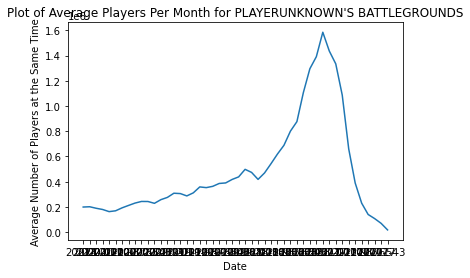

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


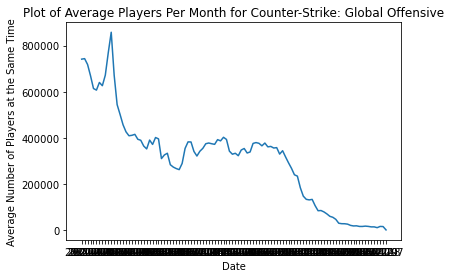

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


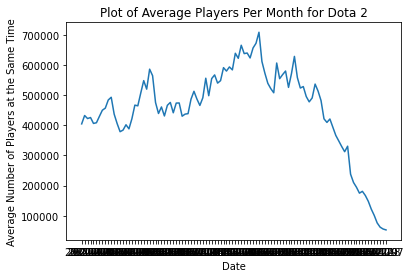

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


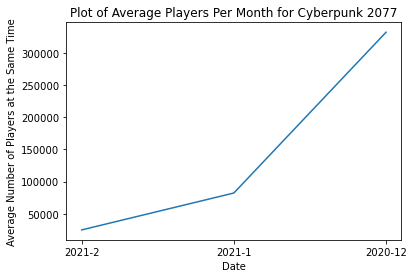

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


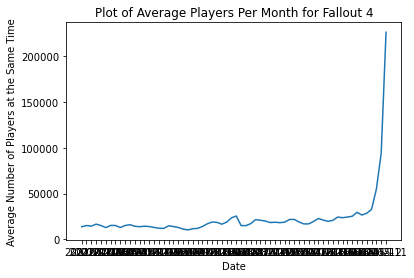

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


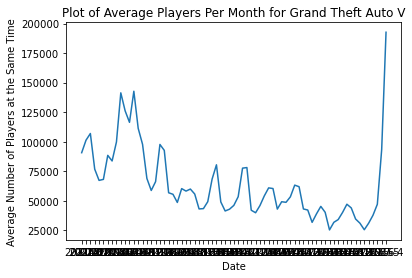

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


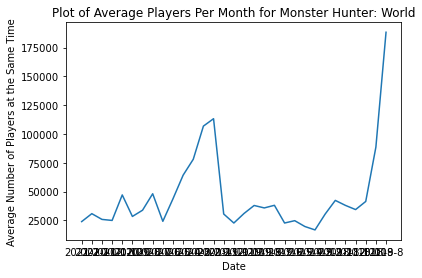

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


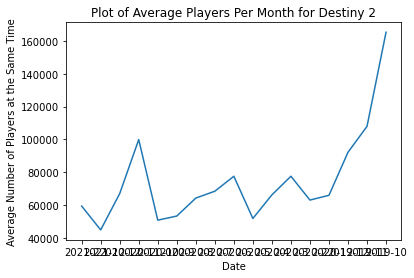

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


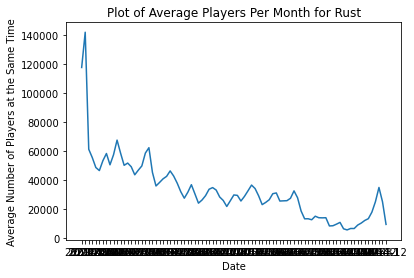

<ipython-input-46-4964962b821f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['year'].astype(str) + "-" + df['month'].astype(str)


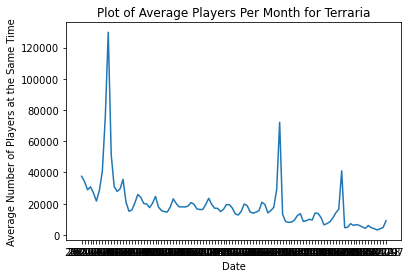

In [48]:
for df in data_top:
    #print(df.info())
    plotPresentData(df, df.iloc[0]['gamename'])